In [47]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Clustering Demo Notebook

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

<IPython.core.display.Javascript object>

In [49]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/fortune1000.csv"
)

<IPython.core.display.Javascript object>

In [50]:
data.head(4)

,Rank,Company,Revenue (M),Profit (M),Assets (M),Employees,Sector,Industry,Years on List,State
0,1,Walmart,500343.0,9862.0,204522.0,2300000,Retailing,General Merchandisers,24,AR
1,2,Exxon Mobil,244363.0,19710.0,348691.0,71200,Energy,Petroleum Refining,24,TX
2,3,Berkshire Hathaway,242137.0,44940.0,702095.0,377000,Financials,Insurance: Property and Casualty (Stock),24,NE
3,4,Apple,229234.0,48351.0,375319.0,123000,Technology,"Computers, Office Equipment",24,CA


<IPython.core.display.Javascript object>

## Exploring the Data

In [51]:
data.describe()

,Rank,Revenue (M),Profit (M),Assets (M),Employees,Years on List
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,500.499000,14378.202400,1109.549000,4.602315e+04,3.365251e+04,7.990000
std,288.818771,30835.849087,3473.900761,1.992486e+05,9.146179e+04,9.872252
min,1.000000,1848.000000,-6798.000000,4.790000e+02,1.260000e+02,0.000000
25%,250.750000,2886.500000,96.450000,3.498250e+03,6.400000e+03,0.000000
50%,500.500000,5417.000000,317.700000,8.370500e+03,1.279950e+04,0.500000
75%,750.250000,12108.750000,971.150000,2.371225e+04,2.922500e+04,18.250000
max,1000.000000,500343.000000,48351.000000,3.345529e+06,2.300000e+06,24.000000


<IPython.core.display.Javascript object>

In [52]:
data.describe(include=["O"])

,Company,Sector,Industry,State
count,1000,1000,1000,1000
unique,1000,21,74,45
top,Yum Brands,Financials,Utilities: Gas and Electric,CA
freq,1,155,35,118


<IPython.core.display.Javascript object>

In [53]:
data.isnull().sum().loc[lambda x: x > 0]

Series([], dtype: int64)

<IPython.core.display.Javascript object>

In [54]:
np.log(data["Profit (M)"])

/Users/mswirsky/opt/anaconda3/envs/thinkful/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mswirsky/opt/anaconda3/envs/thinkful/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0       9.196444
1       9.888881
2      10.713084
3      10.786242
4       9.264639
         ...    
995     4.000034
996     4.815431
997     5.025195
998     3.701302
999     6.026349
Name: Profit (M), Length: 1000, dtype: float64

<IPython.core.display.Javascript object>

### Outliers

/Users/mswirsky/opt/anaconda3/envs/thinkful/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mswirsky/opt/anaconda3/envs/thinkful/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/mswirsky/opt/anaconda3/envs/thinkful/lib/python3.7/site-packages/numpy/core/_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/Users/mswirsky/opt/anaconda3/envs/thinkful/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


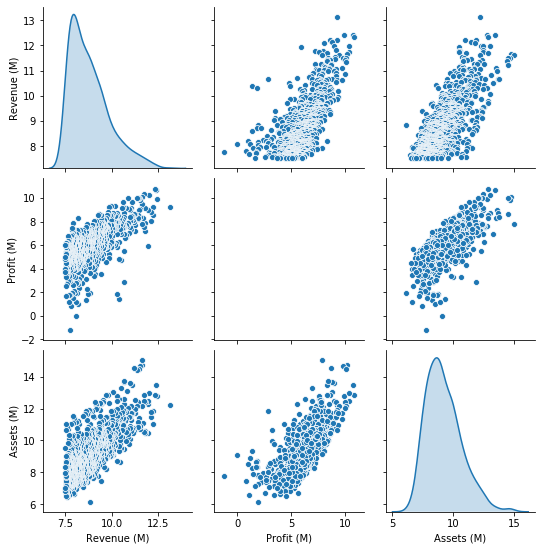

<IPython.core.display.Javascript object>

In [55]:
numeric = data.loc[:, ["Revenue (M)", "Profit (M)", "Assets (M)"]]

sns.pairplot(data=np.log(numeric), diag_kind="kde")
plt.show()

### Relationships by Sector

In [56]:
def barchart(df, x, y, groups=None, width=14, length=8, title="", sorted=False):
    # Takes groupby().agg({col:mean})
    if sorted == True:
        df = df.sort_values(x, ascending=False).reset_index(drop=True)

    plt.figure(figsize=(width, length))
    sns.barplot(data=df, x=x, y=y, hue=groups)
    plt.title(title + "\n", fontsize=16)

<IPython.core.display.Javascript object>

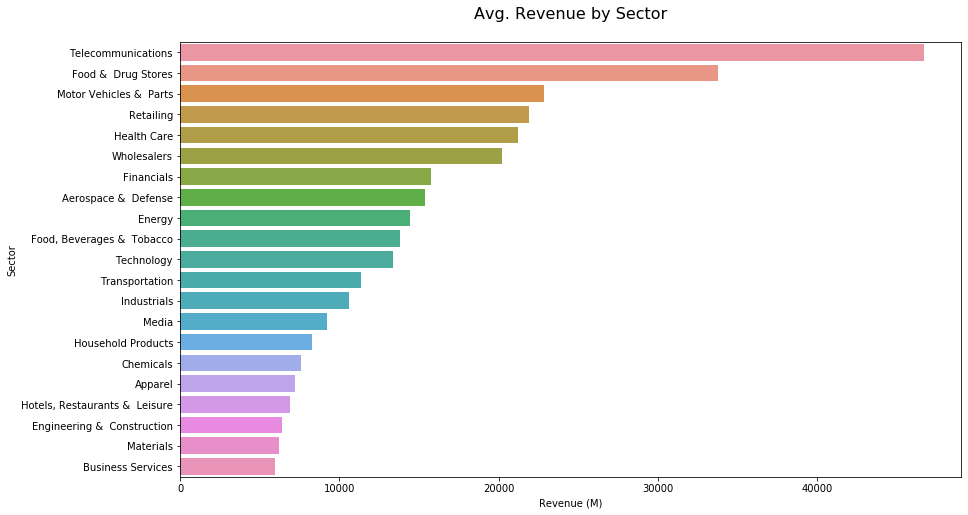

<IPython.core.display.Javascript object>

In [57]:
avg_revenue = data.groupby("Sector").agg({"Revenue (M)": "mean"}).reset_index()

barchart(
    avg_revenue,
    "Revenue (M)",
    "Sector",
    sorted=True,
    title="Avg. Revenue by Sector",
)

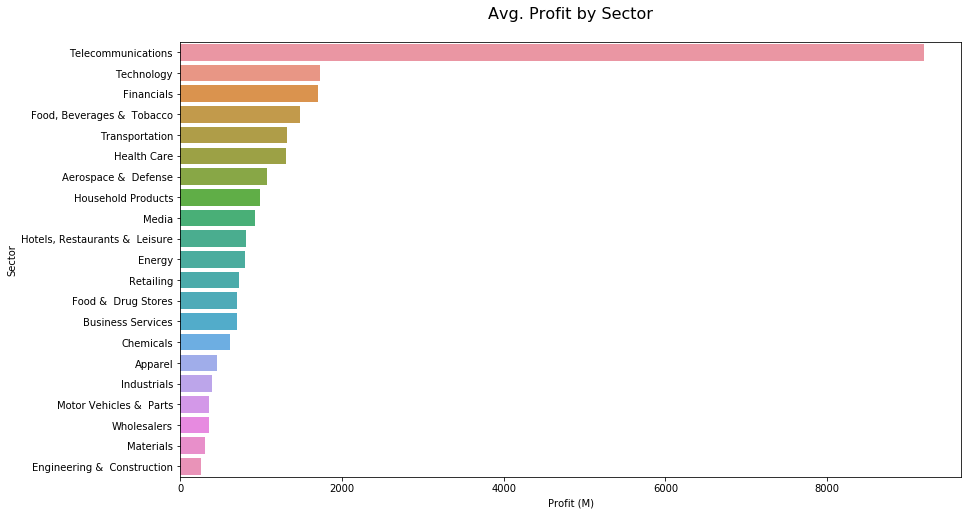

<IPython.core.display.Javascript object>

In [58]:
avg_profit = data.groupby("Sector").agg({"Profit (M)": "mean"}).reset_index()

barchart(
    avg_profit,
    "Profit (M)",
    "Sector",
    sorted=True,
    title="Avg. Profit by Sector",
)

## Compute Gower Distance Matrix

In [59]:
import gower
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

<IPython.core.display.Javascript object>

In [60]:
data.columns

Index(['Rank', 'Company', 'Revenue (M)', 'Profit (M)', 'Assets (M)',
       'Employees', 'Sector', 'Industry', 'Years on List', 'State'],
      dtype='object')

<IPython.core.display.Javascript object>

In [61]:
dist_matrix = gower.gower_matrix(
    data.drop(["Rank", "Company", "Years on List"], axis=1)
)
pd.DataFrame(dist_matrix)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.672039,0.734130,0.748485,0.645624,0.672466,0.662329,0.506653,0.714009,0.694456,...,0.748570,0.748571,0.604843,0.747345,0.744896,0.748163,0.747394,0.747639,0.747099,0.746888
1,0.672039,0.000000,0.528652,0.511453,0.485340,0.492332,0.498569,0.530846,0.350394,0.527159,...,0.282723,0.568438,0.567567,0.567211,0.564762,0.568029,0.567261,0.567506,0.566966,0.566755
2,0.734130,0.528652,0.000000,0.470838,0.560691,0.591138,0.581001,0.591662,0.510737,0.612448,...,0.667242,0.667243,0.666372,0.666017,0.663568,0.666834,0.666066,0.666311,0.665771,0.522703
3,0.748485,0.511453,0.470838,0.000000,0.553115,0.423686,0.566345,0.598621,0.508291,0.594935,...,0.642647,0.356934,0.641777,0.641422,0.638973,0.642240,0.641471,0.498859,0.498319,0.498108
4,0.645624,0.485340,0.560691,0.553115,0.000000,0.459018,0.306025,0.474077,0.502548,0.486601,...,0.535123,0.535124,0.534253,0.533898,0.388591,0.534715,0.391090,0.534192,0.390795,0.533441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.748163,0.568029,0.666834,0.642240,0.534715,0.361411,0.514405,0.527224,0.584669,0.503259,...,0.429514,0.429346,0.429034,0.429389,0.431858,0.000000,0.429342,0.429101,0.429715,0.430286
996,0.747394,0.567261,0.666066,0.641471,0.391090,0.503500,0.227922,0.526455,0.583900,0.502847,...,0.429772,0.429756,0.428884,0.429341,0.145730,0.429342,0.000000,0.429063,0.286600,0.430525
997,0.747639,0.567506,0.666311,0.498859,0.534192,0.360887,0.513881,0.526700,0.584145,0.503241,...,0.429578,0.143801,0.429128,0.428866,0.431937,0.429101,0.429063,0.000000,0.287088,0.287176
998,0.747099,0.566966,0.665771,0.498319,0.390795,0.360348,0.370484,0.526160,0.583605,0.502122,...,0.430228,0.287303,0.429413,0.430227,0.287954,0.429715,0.286600,0.287088,0.000000,0.288549


<IPython.core.display.Javascript object>

## Clustering

- Two methods (KMeans and GaussianMixture) will cluster based on scaled numeric features.
- Two methods (Agglomerative and DBSCAN) will cluster based on gower distance matrix.

In [25]:
k_clusters = 4

<IPython.core.display.Javascript object>

In [23]:
scaler = preprocessing.MinMaxScaler()
num_scaled = scaler.fit_transform(numeric)
num_log = np.log(num_scaled + 1)
num_log

array([[6.93147181e-01, 2.63971203e-01, 5.92104367e-02],
       [3.96420561e-01, 3.92488934e-01, 9.90284372e-02],
       [3.93412032e-01, 6.61733588e-01, 1.90411691e-01],
       ...,
       [6.01809642e-06, 1.18694493e-01, 1.07504113e-03],
       [2.00603616e-06, 1.16894139e-01, 1.86228006e-04],
       [0.00000000e+00, 1.22904674e-01, 4.06044375e-03]])

<IPython.core.display.Javascript object>

In [28]:
kmeans = KMeans(n_clusters=k_clusters)
data["KMeans"] = kmeans.fit_predict(num_log)

0    909
1     75
3     10
2      6
Name: KMeans, dtype: int64

<IPython.core.display.Javascript object>

In [29]:
aggs = {
    "Company": "count",
    "Revenue (M)": "mean",
    "Profit (M)": "mean",
    "Assets (M)": "mean",
}

colnames = [
    "Records",
    "Revenue",
    "Profit",
    "Assets",
]

kmeans_summary = data.groupby("KMeans").agg(aggs)
kmeans_summary.columns = colnames
kmeans_summary.style.background_gradient()

,Records,Revenue,Profit,Assets
KMeans,,,,
0,909,7388.301870,502.414191,18787.303300
1,75,68592.773333,4380.140000,158271.600000
2,6,97823.333333,11024.333333,2334060.166667
3,10,193083.800000,25819.800000,307075.700000


<IPython.core.display.Javascript object>

In [32]:
gmm = GaussianMixture(n_components=k_clusters)
data["GMM"] = gmm.fit_predict(num_log)

<IPython.core.display.Javascript object>

In [33]:
aggs = {
    "Company": "count",
    "Revenue (M)": "mean",
    "Profit (M)": "mean",
    "Assets (M)": "mean",
}

colnames = [
    "Records",
    "Revenue",
    "Profit",
    "Assets",
]

gmm_summary = data.groupby("GMM").agg(aggs)
gmm_summary.columns = colnames
gmm_summary.style.background_gradient()

,Records,Revenue,Profit,Assets
GMM,,,,
0,575,3939.623130,234.884348,5390.790783
1,19,54729.157895,5287.931579,1093829.105263
2,128,59570.648438,4946.971875,119585.617188
3,278,12402.957194,866.213669,24581.762590


<IPython.core.display.Javascript object>

In [41]:
pd.DataFrame(
    gmm.covariances_[1], index=numeric.columns, columns=numeric.columns
).style.background_gradient()

,Revenue (M),Profit (M),Assets (M)
Revenue (M),0.003722,0.003120,0.011121
Profit (M),0.003120,0.011236,0.009649
Assets (M),0.011121,0.009649,0.037353


<IPython.core.display.Javascript object>

In [69]:
aggl = AgglomerativeClustering(
    affinity="precomputed", n_clusters=k_clusters, linkage="complete"
)
data["Agglomerative"] = aggl.fit_predict(dist_matrix)

<IPython.core.display.Javascript object>

In [70]:
aggs = {
    "Company": "count",
    "Revenue (M)": "mean",
    "Profit (M)": "mean",
    "Assets (M)": "mean",
}

colnames = [
    "Records",
    "Revenue",
    "Profit",
    "Assets",
]

agg_summary = data.groupby("Agglomerative").agg(aggs)
agg_summary.columns = colnames
agg_summary.style.background_gradient()

,Records,Revenue,Profit,Assets
Agglomerative,,,,
0,843,13293.173665,933.668446,18609.290273
1,154,14287.941558,1424.113636,188659.603896
2,2,235685.500000,46645.500000,538707.000000
3,1,500343.000000,9862.000000,204522.000000


<IPython.core.display.Javascript object>

In [71]:
agglom_cat = data.pivot_table(
    index="Sector", columns="Agglomerative", values="Company", aggfunc="count"
).fillna(0)
agglom_cat.style.background_gradient()

Agglomerative,0,1,2,3
Sector,,,,
Aerospace & Defense,25.000000,0.000000,0.000000,0.000000
Apparel,14.000000,0.000000,0.000000,0.000000
Business Services,53.000000,0.000000,0.000000,0.000000
Chemicals,33.000000,0.000000,0.000000,0.000000
Energy,107.000000,0.000000,0.000000,0.000000
Engineering & Construction,27.000000,0.000000,0.000000,0.000000
Financials,0.000000,154.000000,1.000000,0.000000
Food & Drug Stores,12.000000,0.000000,0.000000,0.000000
"Food, Beverages & Tobacco",37.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>

In [73]:
dist_matrix.std()

0.06851151

<IPython.core.display.Javascript object>

In [78]:
dbscan = DBSCAN(eps=0.2, min_samples=2, metric="precomputed")
data["DBSCAN"] = dbscan.fit_predict(dist_matrix)

<IPython.core.display.Javascript object>

In [79]:
aggs = {
    "Company": "count",
    "Revenue (M)": "mean",
    "Profit (M)": "mean",
    "Assets (M)": "mean",
}

colnames = [
    "Records",
    "Revenue",
    "Profit",
    "Assets",
]

db_summary = data.groupby("DBSCAN").agg(aggs)
db_summary.columns = colnames
db_summary.style.background_gradient()

,Records,Revenue,Profit,Assets
DBSCAN,,,,
-1,6,208830.500000,11277.000000,1136487.500000
0,107,14425.300935,797.846729,31406.975701
1,251,12861.482470,1276.159761,21033.581275
2,44,20185.204545,355.850000,7389.977273
3,76,15579.078947,603.226316,9214.210526
4,10,46695.900000,9196.580000,119419.900000
5,19,22817.631579,361.110526,30886.631579
6,12,33789.000000,703.358333,14088.166667
7,152,13245.217105,1389.641447,155646.539474


<IPython.core.display.Javascript object>

In [80]:
db_cat = data.pivot_table(
    index="Sector", columns="DBSCAN", values="Company", aggfunc="count"
).fillna(0)
db_cat.style.background_gradient()

DBSCAN,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Sector,,,,,,,,,,,,,,,,,,,
Aerospace & Defense,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apparel,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000
Business Services,0.000000,0.000000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chemicals,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Energy,0.000000,107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Engineering & Construction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
Financials,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Food & Drug Stores,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Food, Beverages & Tobacco",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<IPython.core.display.Javascript object>

## Numeric Field Averages by Cluster

## Categorical Variables by Cluster

For the methods that considered categorical variables via gower matrix.

## Evaluating Agreement Between Clustering Approaches